# Exploratory Data Analysis - Terrorism

# Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing the data
data = pd.read_csv('globalterrorismdb_0718dist.csv',engine='python')


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

In [5]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
#renaming the columns

data.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country_Name','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
           'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targetupe1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)

In [7]:
data.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country_Name,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
#using necessary columns for data analysis and deleting the rest 
data = data[['Year','Month','Extended','Day','Country_Name','State','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','Weapon_type','Motive']]

In [12]:
data.head()

,Year,Month,Extended,Day,Country_Name,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Incendiary,NaN


In [17]:
#Renaming columns
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','attacktyp1_txt':'attactype','region_txt':'region', 'nwound':'wound','nkill':'killed','targtype1_txt':'target','gname':'group','weaptype1_txt':'weapon'},inplace=True)
data.head()

,year,month,day,extended,country,region,city,success,suicide,wound,killed,target,group,weapon
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,0.0,1.0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,0.0,1.0,Journalists & Media,Unknown,Unknown
5,1970,1,1,0,United States,North America,Cairo,1,0,0.0,0.0,Police,Black Nationalists,Firearms
6,1970,1,2,0,Uruguay,South America,Montevideo,0,0,0.0,0.0,Police,Tupamaros (Uruguay),Firearms


In [13]:
data.shape

(181691, 18)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          181691 non-null  int64  
 1   Month         181691 non-null  int64  
 2   Extended      181691 non-null  int64  
 3   Day           181691 non-null  int64  
 4   Country_Name  181691 non-null  object 
 5   State         181270 non-null  object 
 6   Region        181691 non-null  object 
 7   City          181257 non-null  object 
 8   Latitude      177135 non-null  float64
 9   Longitude     177134 non-null  float64
 10  AttackType    181691 non-null  object 
 11  Killed        171378 non-null  float64
 12  Wounded       165380 non-null  float64
 13  Target        181055 non-null  object 
 14  Summary       115562 non-null  object 
 15  Group         181691 non-null  object 
 16  Weapon_type   181691 non-null  object 
 17  Motive        50561 non-null   object 
dtypes: f

In [15]:
#checking for null values
data.isnull().sum()

Year                 0
Month                0
Extended             0
Day                  0
Country_Name         0
State              421
Region               0
City               434
Latitude          4556
Longitude         4557
AttackType           0
Killed           10313
Wounded          16311
Target             636
Summary          66129
Group                0
Weapon_type          0
Motive          131130
dtype: int64

In [16]:
data['Wounded']=data['Wounded'].fillna(0)
#fillna to replace NaN valued with 0
data['Killed']=data['Killed'].fillna(0)

In [18]:
#creating new column casualties having data of killed and wounded
data['Casualties']=data['Killed']+data['Wounded']

In [19]:
data.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded,Casualties
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [20]:
#checking the correlation 
data.corr()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded,Casualties
Year,1.000000,0.000139,0.091754,0.018254,0.166933,0.003917,0.021252,0.017484,0.020675
Month,0.000139,1.000000,-0.000468,0.005497,-0.015978,-0.003880,0.004031,0.003178,0.003805
Extended,0.091754,-0.000468,1.000000,-0.004700,-0.024749,0.000523,0.014586,-0.010175,-0.004570
Day,0.018254,0.005497,-0.004700,1.000000,0.003423,-0.002285,-0.003225,-0.001082,-0.001808
Latitude,0.166933,-0.015978,-0.024749,0.003423,1.000000,0.001463,-0.013170,0.015920,0.009899
Longitude,0.003917,-0.003880,0.000523,-0.002285,0.001463,1.000000,-0.000587,0.000205,0.000013
Killed,0.021252,0.004031,0.014586,-0.003225,-0.013170,-0.000587,1.000000,0.443326,0.651885
Wounded,0.017484,0.003178,-0.010175,-0.001082,0.015920,0.000205,0.443326,1.000000,0.968724
Casualties,0.020675,0.003805,-0.004570,-0.001808,0.009899,0.000013,0.651885,0.968724,1.000000


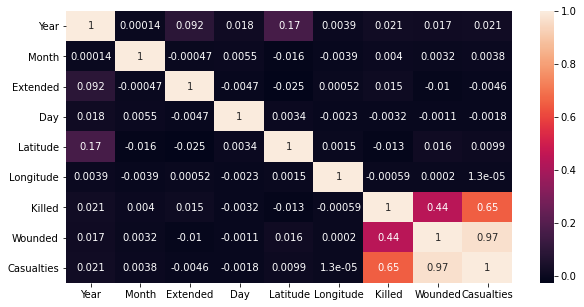

In [21]:
#creating a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot =True)
plt.show()

In [23]:
Year_data = data['Year'].value_counts().sort_values()
#to print attack counts in all years
Year_data

1971      471
1973      473
1972      568
1974      581
1970      651
1975      740
1976      923
1998      934
2004     1166
2003     1278
1977     1319
2002     1333
1999     1395
1978     1526
2000     1814
2001     1906
2005     2017
1982     2544
1981     2586
1980     2662
1979     2662
2006     2758
1986     2860
1983     2870
1985     2915
1996     3058
1995     3081
1987     3183
1997     3197
2007     3242
1994     3456
1984     3495
1988     3721
1990     3887
1989     4324
1991     4683
2009     4721
2008     4805
2010     4826
1992     5071
2011     5076
2012     8522
2017    10900
2013    12036
2016    13587
2015    14965
2014    16903
Name: Year, dtype: int64

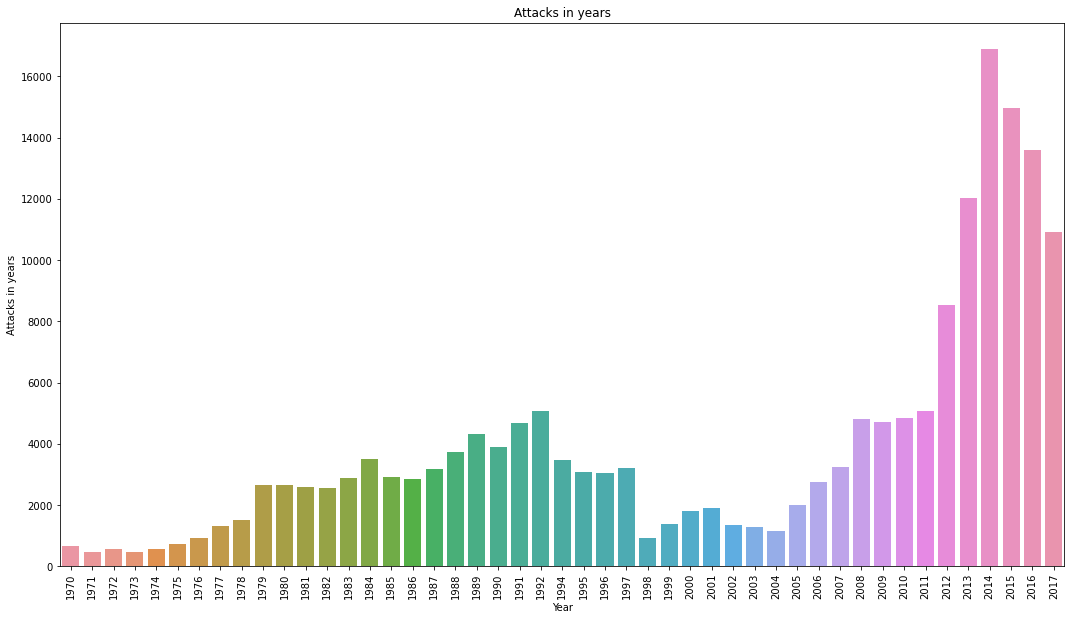

In [27]:
#visualizing the data
plt.figure(figsize=(18,10))
sns.barplot(x= Year_data.index,y = Year_data.values)
plt.title('Attacks in years')
plt.xlabel('Year')
plt.ylabel('Attacks in years')
plt.xticks(rotation = 90)
plt.show()

# from above graph we can conclude that, most attacks happed in year 2014 

# Countries with most attacks 

In [29]:
#15 countries with most attacks
Country_data = data['Country_Name'].value_counts().nlargest(n=15)
Country_data

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country_Name, dtype: int64

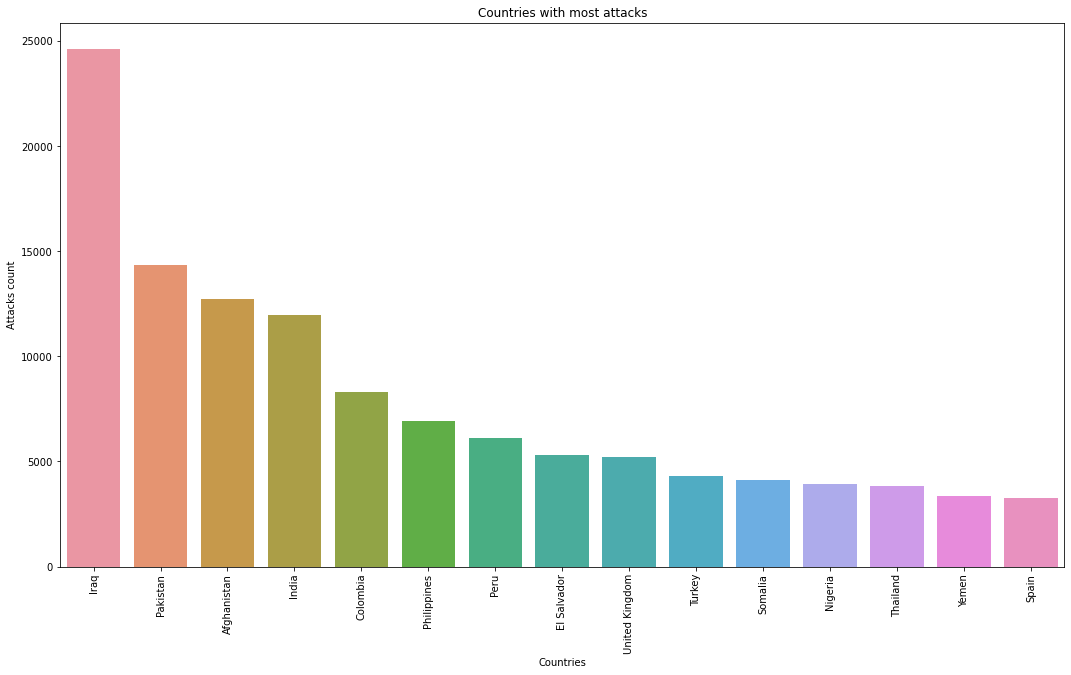

In [30]:
plt.figure(figsize=(18,10))
sns.barplot(x= Country_data.index,y = Country_data.values)
plt.title('Countries with most attacks')
plt.xlabel('Countries')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

#Top 3 Countries ith most attacks are iraq,pakistan and afghanistan

# State with most attacks

In [31]:
#15 States with most attacks
State_data = data['State'].value_counts().nlargest(n=15)
State_data

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Name: State, dtype: int64

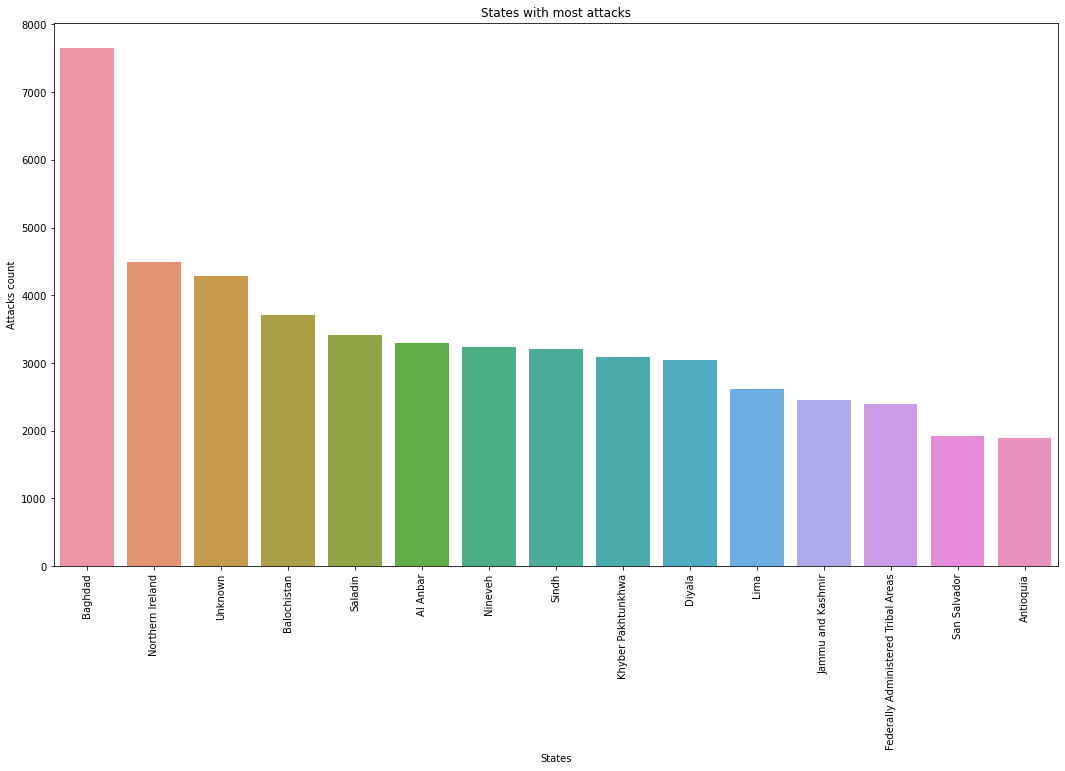

In [32]:
plt.figure(figsize=(18,10))
sns.barplot(x= State_data.index,y = State_data.values)
plt.title('States with most attacks')
plt.xlabel('States')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

Top 3 states  with most attacks are baghdad,northern and unknown state

# Cites with most attacks 

In [33]:
#15 cities with most attacks
City_data = data['City'].value_counts().nlargest(n=15)
City_data

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: City, dtype: int64

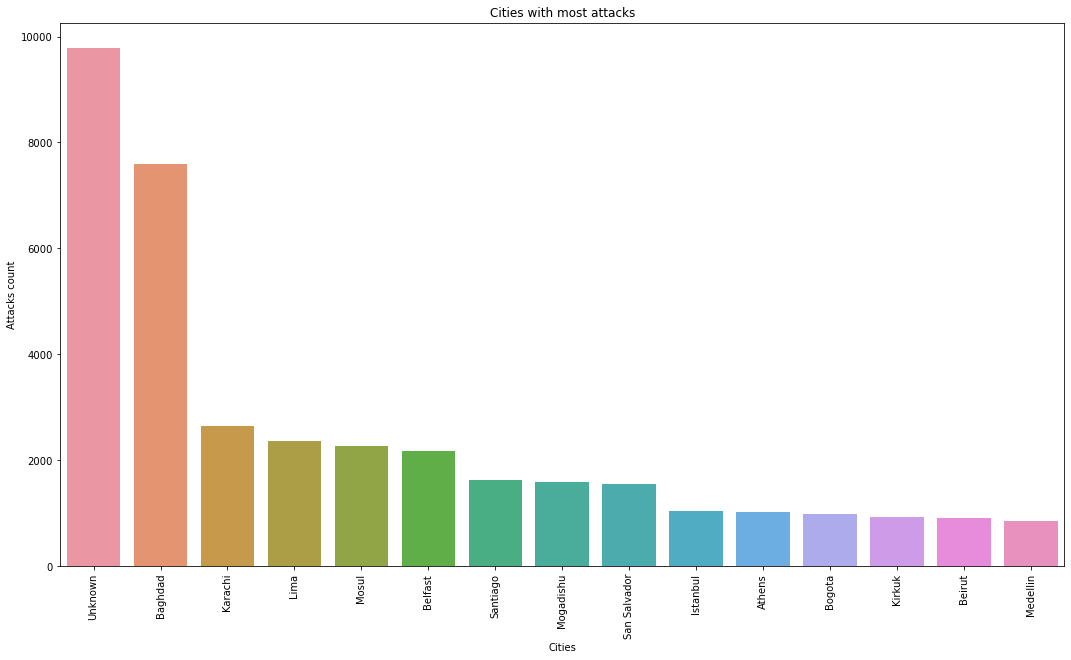

In [34]:
plt.figure(figsize=(18,10))
sns.barplot(x= City_data.index,y = City_data.values)
plt.title('Cities with most attacks')
plt.xlabel('Cities')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

Top 3 Cities  with most attacks are unknown city,baghdad and karachi

# Region with most attacks

In [35]:
#15 Regions with most attacks
Region_data = data['Region'].value_counts().nlargest(n=15)
Region_data

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

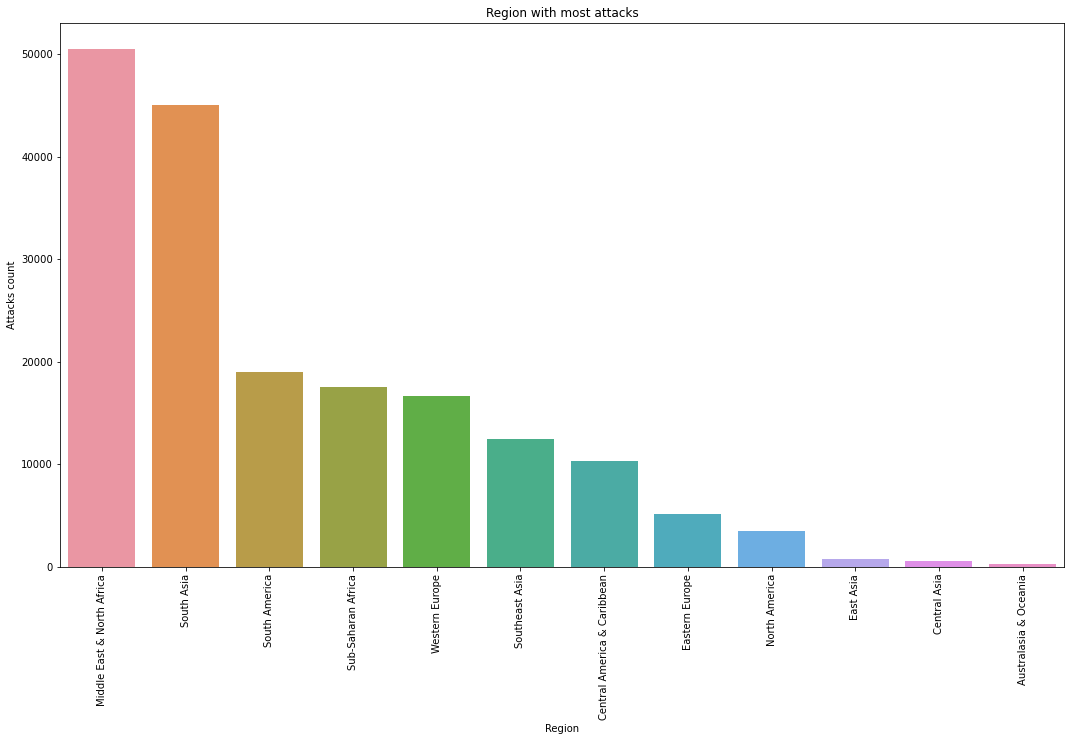

In [36]:
plt.figure(figsize=(18,10))
sns.barplot(x= Region_data.index,y = Region_data.values)
plt.title('Region with most attacks')
plt.xlabel('Region')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

Top 3 Region with most attacks are Middle East&North Africa,South Asia and South America

# Most used attack type

In [37]:
# most frequent attack type
Attack_data = data['AttackType'].value_counts()
Attack_data

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

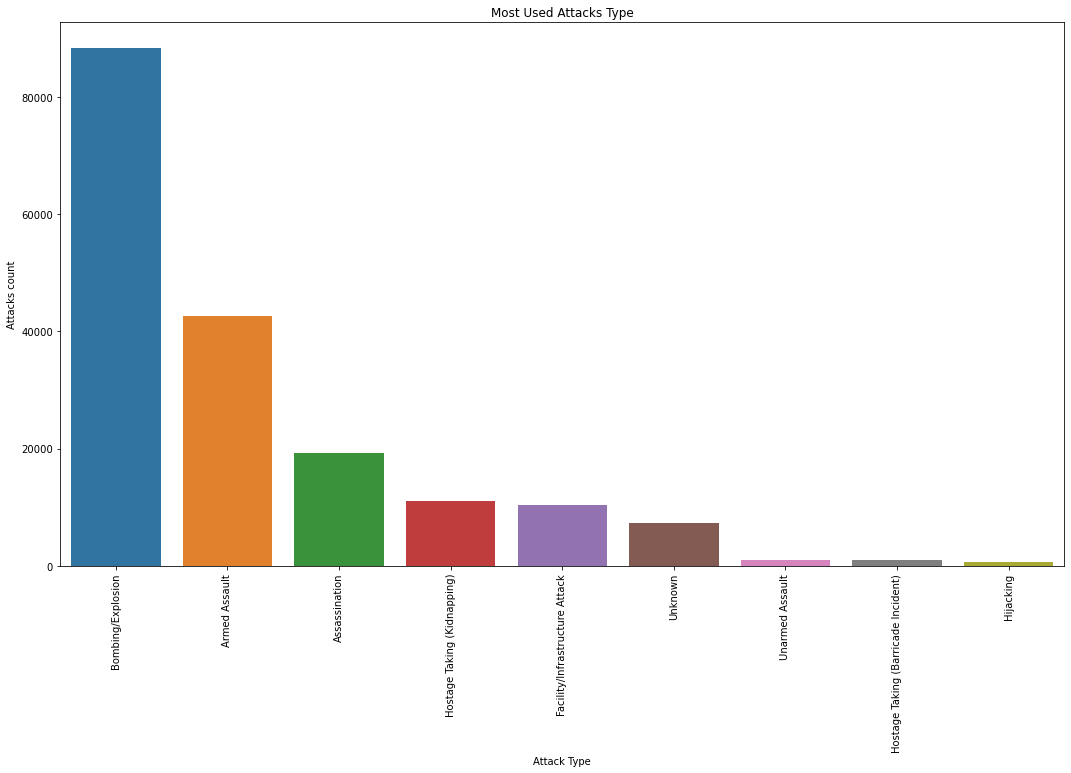

In [38]:
plt.figure(figsize=(18,10))
sns.barplot(x= Attack_data.index,y = Attack_data.values)
plt.title('Most Used Attacks Type')
plt.xlabel('Attack Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

Bombing/Explossion is the most used attack type

# Most Frequent Terrorist Groups involved in attacks

In [39]:
Group_data = data['Group'].value_counts().nlargest(n=15)
Group_data

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64

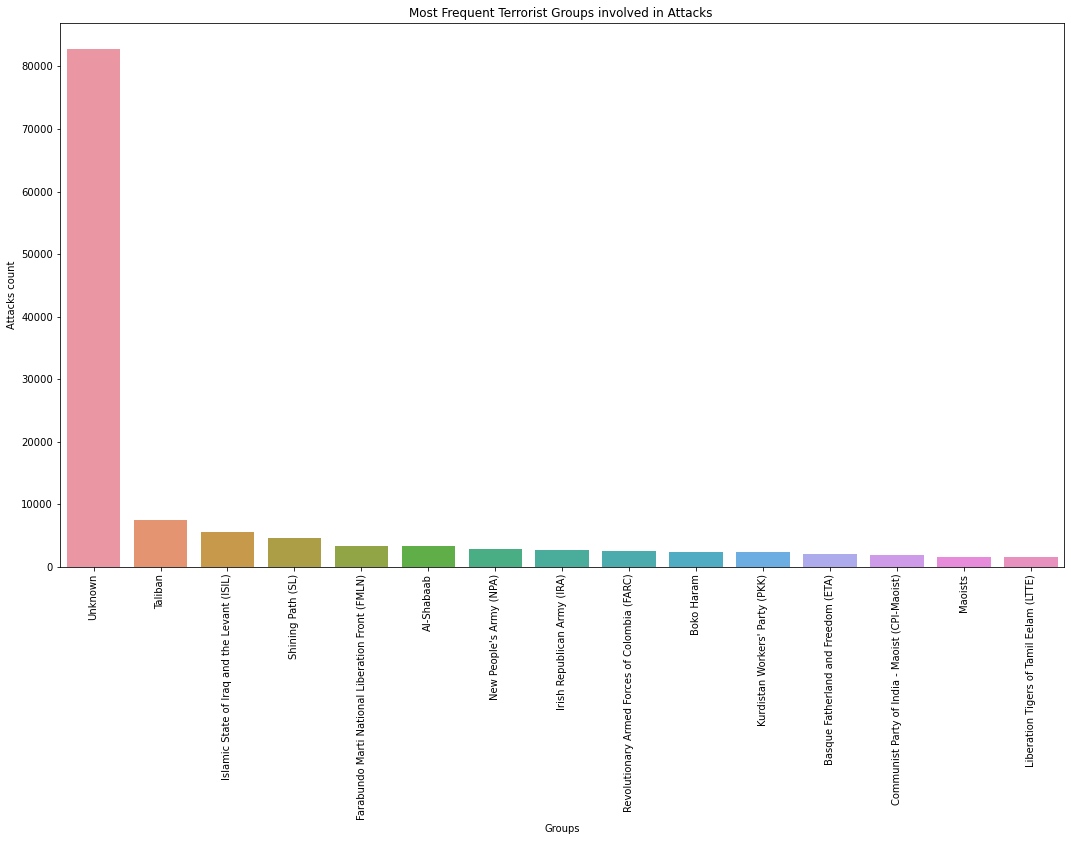

In [40]:
plt.figure(figsize=(18,10))
sns.barplot(x= Group_data.index,y = Group_data.values)
plt.title('Most Frequent Terrorist Groups involved in Attacks ')
plt.xlabel('Groups')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

Most Frequent Terrorist Group involved in Attacks is Taliban(first is Unknown)

# Most Used Weapon Type 

In [44]:
Weapon_data = data['Weapon_type'].value_counts().nlargest(n=15)
Weapon_data

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

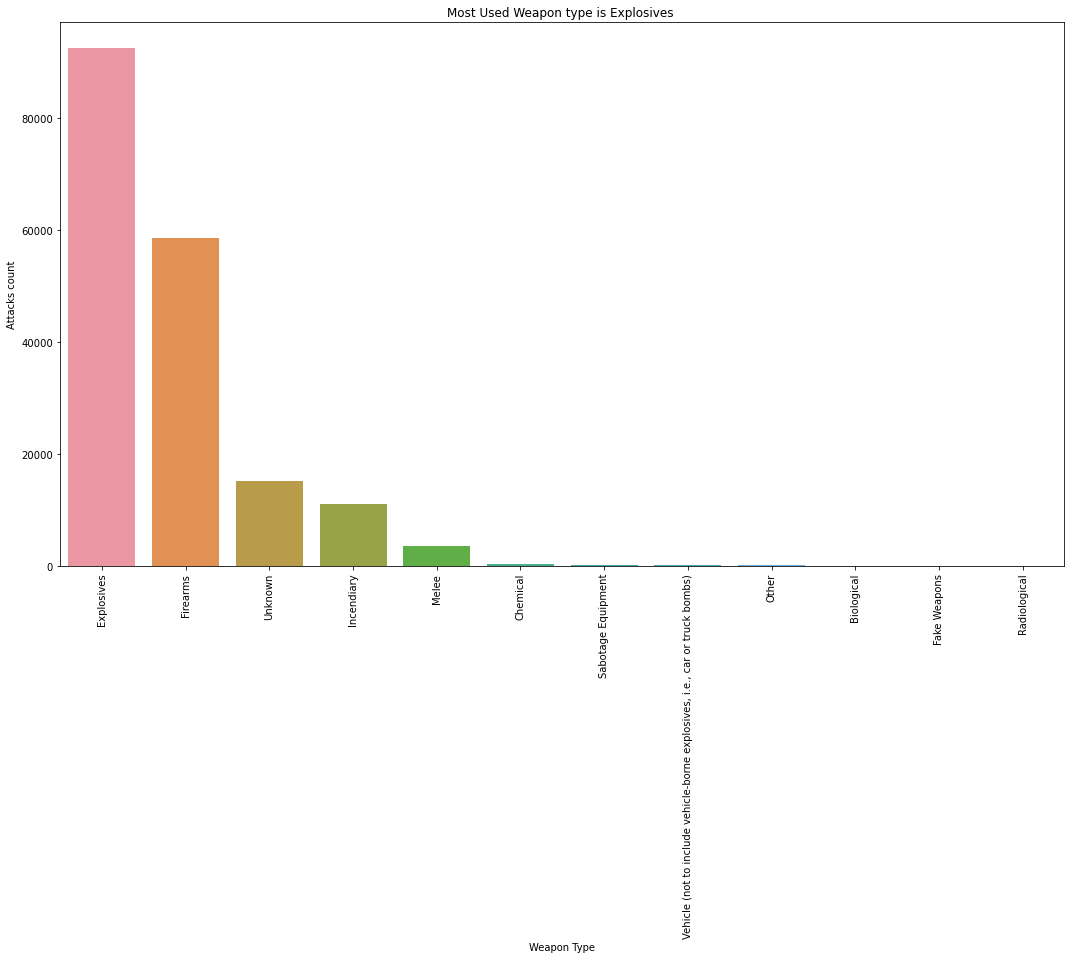

In [45]:
plt.figure(figsize=(18,10))
sns.barplot(x= Weapon_data.index,y = Weapon_data.values)
plt.title('Most Used Weapon type is Explosives ')
plt.xlabel('Weapon Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

Most Used Weapon type is Explosives 

# Wounded Vs Killed Visualization


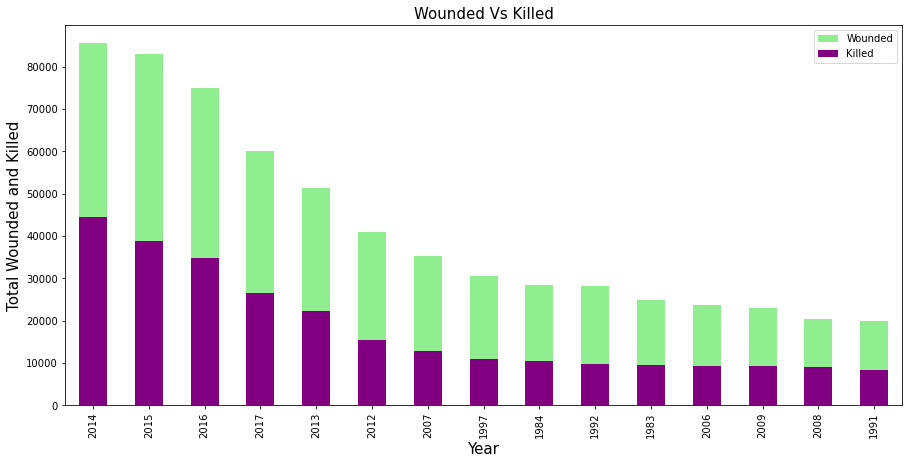

In [48]:
#Wounded Vs Killed with respect to year
Casualty = data.groupby('Year').sum()['Casualties'].nlargest(n=15) #top 15 States with highest Sales
killed = data.groupby('Year').sum()['Killed'].nlargest(n=15) #top 15 States with highest Sales
#plt.style.use('seabarn')
Casualty.plot(kind='bar',figsize=(15,7),fontsize = 10 , color = 'lightgreen', label = 'Wounded')
killed.plot(kind = 'bar', figsize=(15,7),fontsize = 10, color = 'purple', label = 'Killed')
plt.xlabel('Year',fontsize =15)
plt.legend()
plt.ylabel('Total Wounded and Killed', fontsize = 15)
plt.title('Wounded Vs Killed', fontsize = 15)
plt.show()

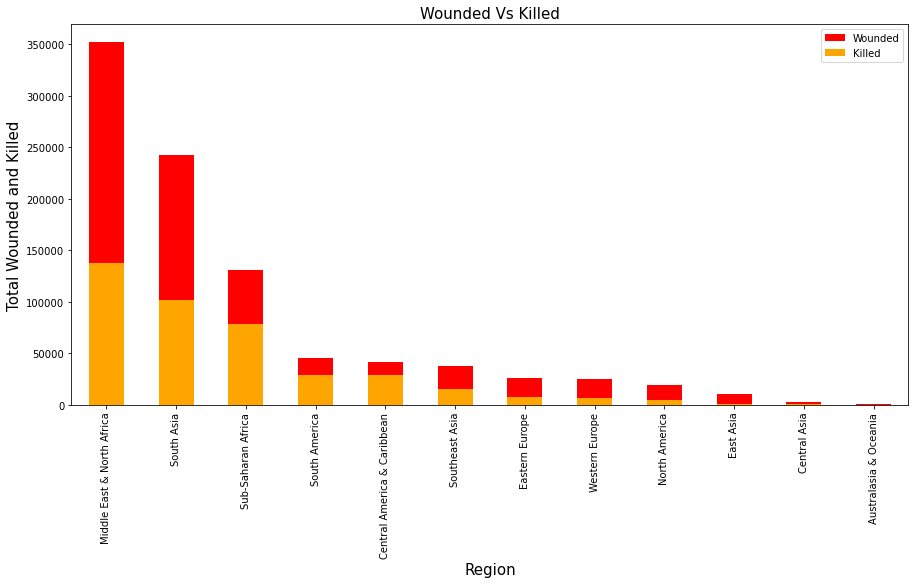

In [50]:
#Wounded Vs Killed with respect to Region
Casualty = data.groupby('Region').sum()['Casualties'].nlargest(n=15)# top 15 states with highest sales
killed = data.groupby('Region').sum()['Killed'].nlargest(n=15) #top 15 States with highest Sales
#plt.style.use('seabarn')
Casualty.plot(kind='bar',figsize=(15,7),fontsize = 10 , color = 'red', label = 'Wounded')
killed.plot(kind = 'bar', figsize=(15,7),fontsize = 10, color = 'orange', label = 'Killed')
plt.xlabel('Region',fontsize =15)
plt.legend()
plt.ylabel('Total Wounded and Killed', fontsize = 15)
plt.title('Wounded Vs Killed', fontsize = 15)
plt.show()

# Conclusion:

# Hot zones are:
    >Top 3 countries with most attacks are Iraq,Pakistan and Afganistan.
    >Top 3 states with most attacks are Baghdad,Northen Ireland and Unknown state.
    >Top 3 cities with most attacks are Unknown city,Baghdad and Karachi.
    >Top 3 region with most attacks are Middle East & North Africa,South Asia and South America.
    >Year with most attacks is 2014.
    >Most frequent space terrorist groups involved in attacks are Taliban and Islamic state of Iraq and the Levant(Isil). 
